<a href="https://colab.research.google.com/github/ChongXern/BostonHacks/blob/main/EE4211_Group10_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

In [ ]:
year = "2024"
month = "7"
day = "24"
hour = "7"
minute = "30"
second = "0"

site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
response_API = requests.get(site)
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]

data = data["items"][0]["carpark_data"]
df = pd.DataFrame(data)

for heading in ("total_lots","lot_type","lots_available"):
    df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
df = df.drop(["carpark_info"], axis=1)

# Data Cleaning
df = df.drop_duplicates(subset=["carpark_number"])
unique_carpark_number = len(df)
print(unique_carpark_number)
df = df.loc[(pd.to_datetime(df['update_datetime']).dt.year == int(year)) & (pd.to_datetime(df['update_datetime']).dt.month == int(month))]

df['total_lots'] = df['total_lots'].astype(int)
df['lots_available'] = df['lots_available'].astype(int)

invalid_records = df[df['total_lots'] < df['lots_available']]
print("Example of a carpark with a malfunctioning sensor")
print(invalid_records)

df = df.loc[
    (df['total_lots'] >= df['lots_available']) &
    (df['total_lots'] > 0) &
    (df['lots_available'] >= 0)
]

df = df.loc[df['lot_type'].isin(['C', 'H', 'S', 'Y'])]
df.to_csv("Carpark.csv")
df

1975
Example of a carpark with a malfunctioning sensor
    carpark_number      update_datetime  total_lots lot_type  lots_available
593           SK61  2024-07-24T07:27:48          10        H              50


,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2024-07-24T07:28:34,105,C,27
1,HLM,2024-07-24T07:28:18,583,C,401
2,RHM,2024-07-24T07:28:34,329,C,129
3,BM29,2024-07-24T07:28:24,97,C,57
4,Q81,2024-07-24T07:28:13,97,C,27
...,...,...,...,...,...
1972,BA7,2024-07-24T07:27:51,261,C,114
1973,SS1L,2024-07-24T07:27:59,4,C,0
1974,BA9,2024-07-24T07:27:15,918,C,472
1975,H3DL,2024-07-24T07:27:08,2,C,1


In [ ]:
# 1.2. Carry out and document a systematic approach to approximate the frequency at which the data values are updated.
for s in range(60):
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{str(s).zfill(2)}'
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    timestamp = data["items"][0]["timestamp"]

    data = data["items"][0]["carpark_data"]
    df = pd.DataFrame(data)
    print(f"Data {s}: {df.iloc[0]['update_datetime']}")

minute = "31"
second = "0"
site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]

data = data["items"][0]["carpark_data"]
df = pd.DataFrame(data)
print(f"Data 60: {df.iloc[0]['update_datetime']}")

Data 0: 2024-07-24T07:28:34
Data 1: 2024-07-24T07:28:34
Data 2: 2024-07-24T07:28:34
Data 3: 2024-07-24T07:28:34
Data 4: 2024-07-24T07:28:34
Data 5: 2024-07-24T07:28:34
Data 6: 2024-07-24T07:28:34
Data 7: 2024-07-24T07:28:34
Data 8: 2024-07-24T07:28:34
Data 9: 2024-07-24T07:28:34
Data 10: 2024-07-24T07:28:34
Data 11: 2024-07-24T07:28:34
Data 12: 2024-07-24T07:28:34
Data 13: 2024-07-24T07:28:34
Data 14: 2024-07-24T07:28:34
Data 15: 2024-07-24T07:28:34
Data 16: 2024-07-24T07:28:34
Data 17: 2024-07-24T07:28:34
Data 18: 2024-07-24T07:28:34
Data 19: 2024-07-24T07:28:34
Data 20: 2024-07-24T07:28:34
Data 21: 2024-07-24T07:28:34
Data 22: 2024-07-24T07:28:34
Data 23: 2024-07-24T07:28:34
Data 24: 2024-07-24T07:28:34
Data 25: 2024-07-24T07:28:34
Data 26: 2024-07-24T07:28:34
Data 27: 2024-07-24T07:29:34
Data 28: 2024-07-24T07:29:34
Data 29: 2024-07-24T07:29:34
Data 30: 2024-07-24T07:29:34
Data 31: 2024-07-24T07:29:34
Data 32: 2024-07-24T07:29:34
Data 33: 2024-07-24T07:29:34
Data 34: 2024-07-24T07:2

## 1.1 Look at the features in the dataset. What do the values in the column “lot type” mean?
This column refers to the vehicle types in each carpark. C refers to cars, H refers to heavy vehicles, S refers to motorcycles with side car, and Y refers to motorcycles.

## 1.3. (i) How many unique carparks are included in the carpark availability dataset?
There are 1975 unique carparks after removing duplicates in the carpark availability dataset.

## 1.3. (ii) Check if this value varies with time. Explain why this check is important
Comparing different number of carparks across time periods creates misleading trends and leads to incorrect conclusions.

## 1.4. A carpark may have malfunctioning sensors. There are many types of possible malfunctions. Identify one of these carparks that you believe has a malfunctioning sensors. Explain what the “malfunction” is in this case
There is an example above. For this case, total_lots is smaller than available_lots.


In [ ]:
def get_carpark_data(hour, year="2024", month="7", day="12", minute="30", second="0",
                     max_retries=5, retry_delay=2):
    retry_count = 0

    while retry_count < max_retries:
        site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'

        try:
            response_API = requests.get(site, timeout=10)
            response_API.raise_for_status()  # Raise error for bad status codes
            data = json.loads(response_API.text)
            carpark_data = data["items"][0]["carpark_data"]
        except (KeyError, requests.RequestException, json.JSONDecodeError) as e:
            retry_count += 1
            print(f"Error occurred (attempt {retry_count}/{max_retries}): {str(e)}")
            if retry_count < max_retries:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            continue

        # Process the data if we got here
        df = pd.DataFrame(carpark_data)
        for heading in ("total_lots", "lot_type", "lots_available"):
            df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
        df = df.drop(["carpark_info"], axis=1)

        # Data Cleaning
        df = df.drop_duplicates(subset=["carpark_number"])

        # Checking if the number of unique carparks varies overtime
        if (len(df) != unique_carpark_number):
            print(f"Different length detected: {len(df)} rows")

        df = df.loc[(pd.to_datetime(df['update_datetime']).dt.year == int(year)) &
                    (pd.to_datetime(df['update_datetime']).dt.month == int(month))]

        df['total_lots'] = df['total_lots'].astype(int)
        df['lots_available'] = df['lots_available'].astype(int)

        df = df.loc[
            (df['total_lots'] >= df['lots_available']) &
            (df['total_lots'] > 0) &
            (df['lots_available'] >= 0)
        ]

        df = df.loc[df['lot_type'].isin(['C', 'H', 'S', 'Y'])]

        # Check if dataframe is empty after cleaning
        if df.empty:
            retry_count += 1
            print(f"DataFrame empty after cleaning (attempt {retry_count}/{max_retries})")
            if retry_count < max_retries:
                print(f"Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            continue

        # Add a query timestamp column
        df['query_timestamp'] = f"{year}-{month.zfill(2)}-{day.zfill(2)} {hour.zfill(2)}:{minute.zfill(2)}:{second.zfill(2)}"
        hourly_carpark_availability = df['lots_available'].sum() / df['total_lots'].sum()
        df['hourly_carpark_availability'] = hourly_carpark_availability
        df['carpark_availability'] = df['lots_available'] / df['total_lots']

        # Save data to a single combined CSV file
        parent_folder = "./data/Carpark"
        os.makedirs(parent_folder, exist_ok=True)
        combined_filepath = os.path.join(parent_folder, "combined_carpark_data.csv")

        # Append to existing file or create new one
        if os.path.exists(combined_filepath):
            df.to_csv(combined_filepath, mode="a", header=False, index=False)
        else:
            df.to_csv(combined_filepath, mode="w", header=True, index=False)

        return df

In [ ]:
for d in range(1, 32):
    # print("Day:", d, end=None)
    for h in range(24):
        # print("Hour:", h)
        # print(get_carpark_data(hour=str(h), day=str(d)))
        get_carpark_data(hour=str(h), day=str(d))

Error occurred (attempt 1/5): HTTPSConnectionPool(host='api.data.gov.sg', port=443): Read timed out. (read timeout=10)
Retrying in 2 seconds...


In [ ]:
df = pd.read_csv("./data/Carpark/combined_carpark_data.csv")
print(df)

        carpark_number      update_datetime  total_lots lot_type  \
0                 HE12  2024-07-01T00:28:01         105        C   
1                  HLM  2024-07-01T00:28:10         583        C   
2                  RHM  2024-07-01T00:28:01         329        C   
3                 BM29  2024-07-01T00:27:50          97        C   
4                  Q81  2024-07-01T00:27:51          97        C   
...                ...                  ...         ...      ...   
1424746            BA7  2024-07-31T23:27:51         261        C   
1424747           SS1L  2024-07-31T23:26:54           4        C   
1424748            BA9  2024-07-31T23:27:30         918        C   
1424749           H3DL  2024-07-31T23:28:08           2        C   
1424750           H3BL  2024-07-31T23:25:11          10        C   

         lots_available      query_timestamp  hourly_carpark_availability  \
0                    27  2024-07-01 00:30:00                     0.477659   
1                   502  2024

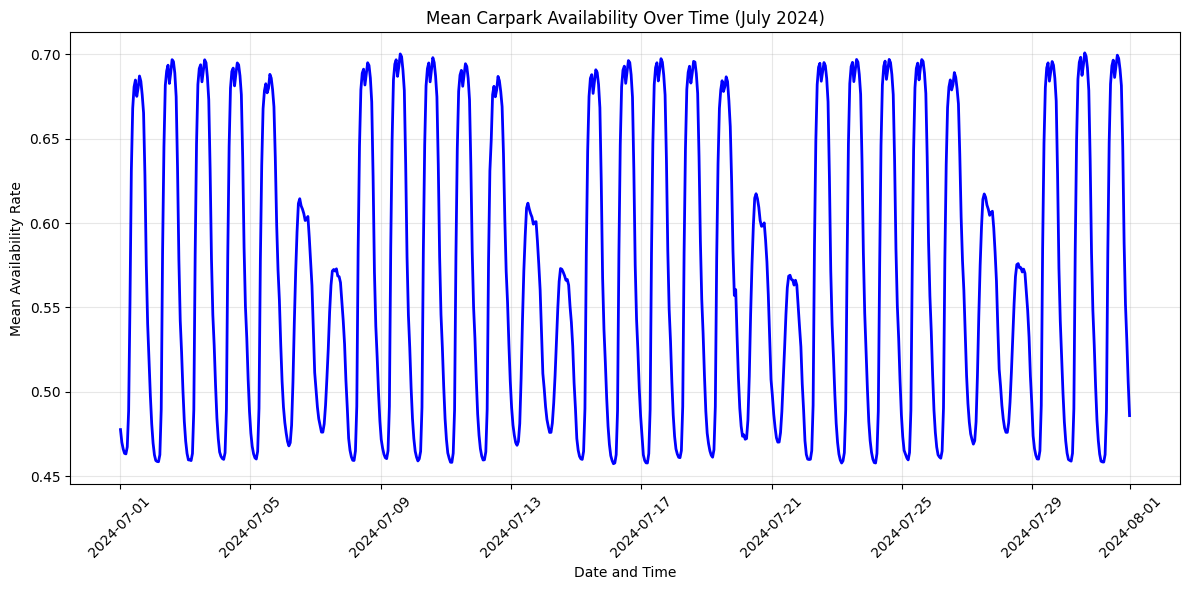

In [ ]:
df['query_timestamp'] = pd.to_datetime(df['query_timestamp'])

unique_data = df[['query_timestamp', 'hourly_carpark_availability']].drop_duplicates()

plt.figure(figsize=(12, 6))
plt.plot(unique_data['query_timestamp'], unique_data['hourly_carpark_availability'],
         linewidth=2, color='blue')

plt.title('Mean Carpark Availability Over Time (July 2024)')
plt.xlabel('Date and Time')
plt.ylabel('Mean Availability Rate')
plt.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

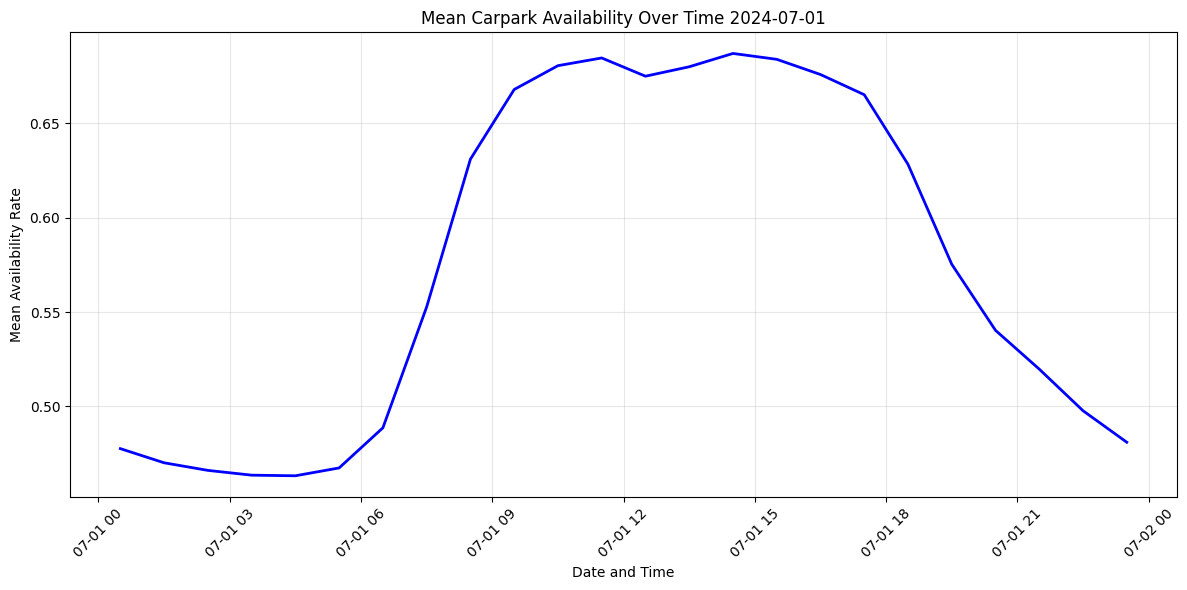

In [ ]:
target_date = '2024-07-01'
date_data = df[df['query_timestamp'].dt.date == pd.to_datetime(target_date).date()]
unique_date_data = date_data[['query_timestamp', 'hourly_carpark_availability']].drop_duplicates()

plt.figure(figsize=(12, 6))
plt.plot(unique_date_data['query_timestamp'], unique_date_data['hourly_carpark_availability'],
         linewidth=2, color='blue')

plt.title(f'Mean Carpark Availability Over Time {target_date}')
plt.xlabel('Date and Time')
plt.ylabel('Mean Availability Rate')
plt.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## 1.5. Create a dataset of hourly carpark availability (i.e., for this project, use the ratio: lots available/total lots) from the raw data for the month of July 2024. Plot the average (average across all carparks) hourly carpark availability against time for that interval. Identify any patterns in the plot.
We can see that availability rate is below 50% overnight, then then rises sharply during morning commute hours, peaking above 68% during midday. Afterwards, it declines during the evening back to below 50%. While peak and minimum rates vary between days, this overall trend holds across all days.

In [ ]:
# # Download folder from google collab
# from google.colab import files
# import shutil

# # Zip the folder
# shutil.make_archive("/content/Carpark", 'zip', "/content/Carpark")

# # Download the zip file
# files.download("/content/Carpark.zip")

## 1.6 Intuitively, we expect that carpark availability across certain carparks to be correlated. For example, many housing carparks would experience higher carpark availability during working hours. Using the same interval chosen in 1.5, pick a carpark and find the carpark that is most correlated to it (in terms of carpark availability). State the type of correlation used (e.g. Spearman, Pearson, etc).

In [ ]:
reference = "HLM"

correlations = df.corrwith(df[reference])
correlations = correlations.sort_values(ascending=False)
correlations = correlations.drop(reference)

print(correlations)

In [ ]:
from scipy.stats import spearmanr

def compute_carpark_spearman_corr(df, carpark1, carpark2):
  series1 = df[carpark1]
  series2 = df[carpark2]

  aligned = pd.concat([series1, series2], axis=1, join='inner')
  # print("aligned df:", aligned)
  corr, p_val = spearmanr(aligned.iloc[:, 0], aligned.iloc[:, 1])
  return corr, p_val


# 1.6 Correlation of Carpark Availability

In [ ]:
unique_carpark_number = 1975
for d in range(1, 3):
    # print("Day:", d, end=None)
    for h in range(24):
        # print("Hour:", h)
        # print(get_carpark_data(hour=str(h), day=str(d)))
        get_carpark_data(hour=str(h), day=str(d))

(744929, 8)
(744929, 8)
Most positively correlated carparks with pearson:
carpark_number
FRM    0.959675
BH2    0.952535
KLM    0.947822
Name: HLM, dtype: float64
Most negatively correlated carparks with pearson:
carpark_number
SE25   -0.959305
BE10   -0.958037
PM30   -0.956989
Name: HLM, dtype: float64


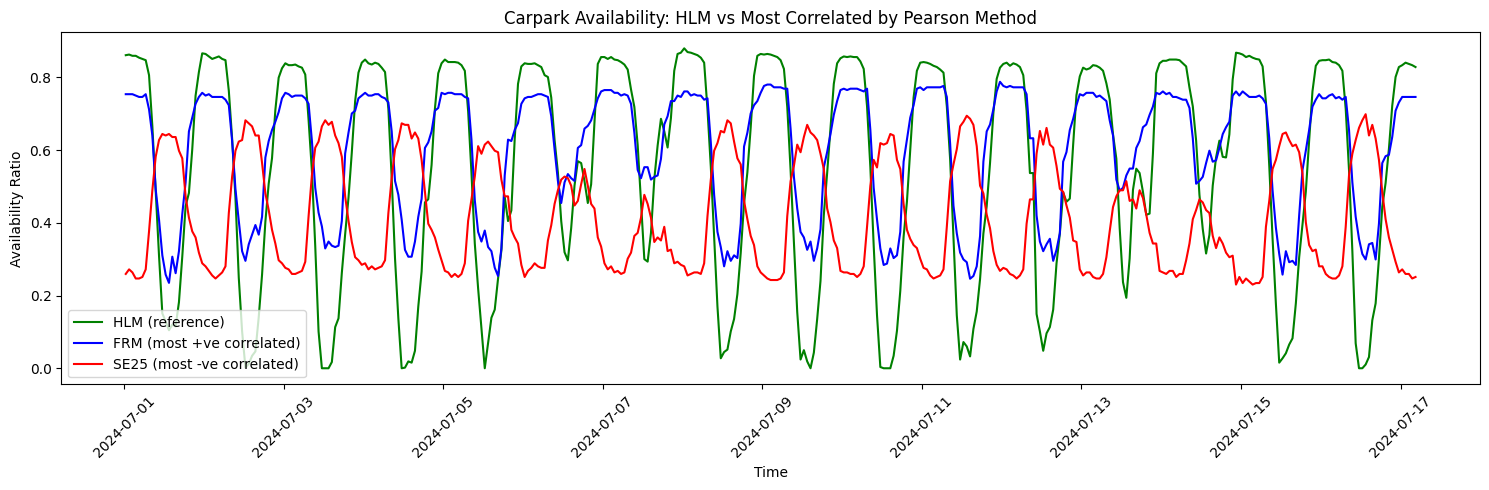

Most positively correlated carparks with spearman:
carpark_number
TPM    0.926107
FRM    0.921574
GEM    0.915444
Name: HLM, dtype: float64
Most negatively correlated carparks with spearman:
carpark_number
HG90   -0.959996
B85    -0.959561
PL65   -0.959179
Name: HLM, dtype: float64


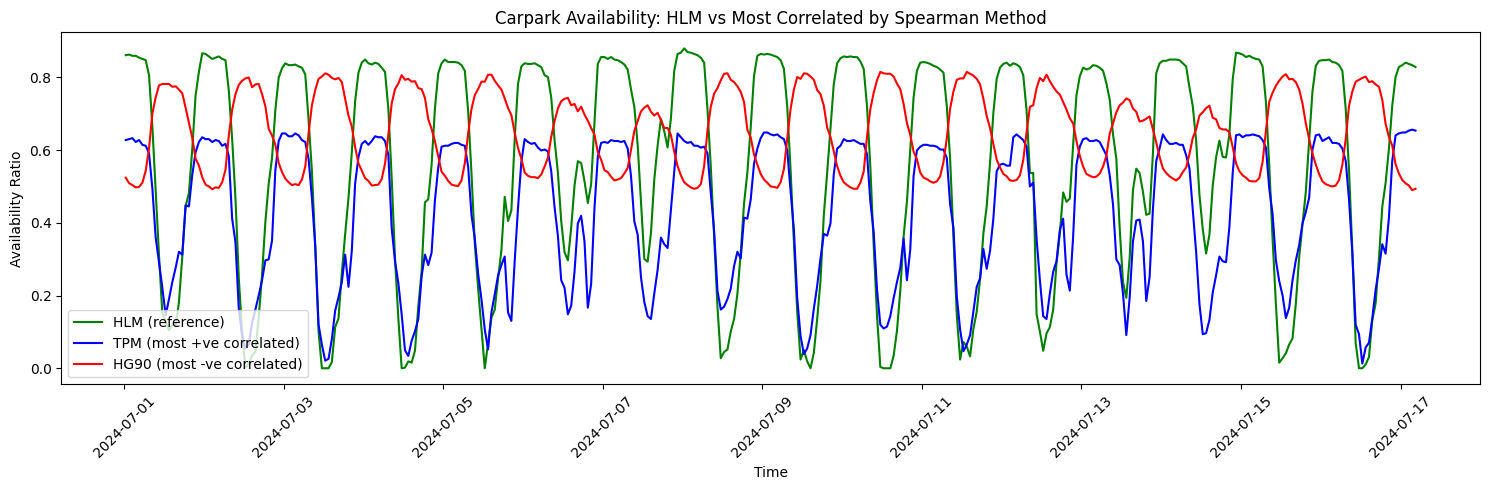

In [ ]:
full_df = pd.read_csv("./data/Carpark/combined_carpark_data.csv")
full_df["query_timestamp"] = pd.to_datetime(full_df["query_timestamp"])
print(full_df.shape)
full_df_unique = full_df.drop_duplicates(subset=['query_timestamp', 'carpark_number'])
print(full_df_unique.shape)

methods = ['pearson', 'spearman']#, 'kendall']
for m in methods:
  correlation_df = full_df_unique.pivot(index="query_timestamp", columns="carpark_number", values="carpark_availability")
  correlation_df = correlation_df.dropna(axis=1, thresh=25)
  corr_matrix = correlation_df.corr(method=m)

  carpark = 'HLM'
  correlation_carpark = corr_matrix[carpark].drop(carpark).dropna()
  most_positive_corr = correlation_carpark.sort_values(ascending=False)
  most_negative_corr = correlation_carpark.sort_values(ascending=True)
  print(f"Most positively correlated carparks with {m}:\n{most_positive_corr.head(3)}")
  print(f"Most negatively correlated carparks with {m}:\n{most_negative_corr.head(3)}")
  top_neg_corr = most_negative_corr.index[0]
  top_pos_corr = most_positive_corr.index[0]

  time = correlation_df.index
  ref_carpark_availability = correlation_df[carpark]
  pos_carpark_availability = correlation_df[top_pos_corr]
  neg_carpark_availability = correlation_df[top_neg_corr]

  plt.figure(figsize=(15,5))
  plt.plot(time, ref_carpark_availability, label=f"{carpark} (reference)", color="green")
  plt.plot(time, pos_carpark_availability, label=f"{top_pos_corr} (most +ve correlated)", color="blue")
  plt.plot(time, neg_carpark_availability, label=f"{top_neg_corr} (most -ve correlated)", color="red")
  plt.title(f"Carpark Availability: {carpark} vs Most Correlated by {m.title()} Method")
  plt.xlabel("Time")
  plt.ylabel("Availability Ratio")
  plt.xticks(rotation=45)
  plt.legend()
  plt.tight_layout()
  plt.show()

From the graphs above, the pearson method is better at identifying correlations in this set of data. The carpark HLM is most positively correlated to BM29, while being most negatively correlated to C2M.

# Group Project Proposal
**Project Idea**: Forecasting HDB Car Park Lot Availability Using Spatial and Environmental Analysis


## Problem Statement
According to HDB data from 2020 to 2025, multi-storey carparks make up 49.3% of all HDB car parks followed closely by surface carparks at 47.6%. We hypothesise that they can behave differently to weather patterns. For example, we expect there to be less surface parkers when the temperature is high and more multi-storey parkers under rainy weather.

Understanding these hypothesised differences can help urban planners optimise parking infrastructure for HDB residents.

## Questions we want to research
- How does weather metrics such as rainfall intensity affect car park lot availability for multi-storey and surface car parks?
- How do nearby car park clusters affect the parking availability, and to what degree of correlation based on distance?
- Can we build a predictive ML model that considers both weather sensitivity and nearby parking patterns for parking availability?

## Methodology
The main data sources will come from the official [HDB Carpark Information](https://data.gov.sg/datasets/d_23f946fa557947f93a8043bbef41dd09/view) and supplementary historical weather data, namely [rainfall readings](https://api-open.data.gov.sg/v2/real-time/api/rainfall) and [temperature readings](https://api-open.data.gov.sg/v2/real-time/api/weather?api=wbgt), all to be cross-referenced based on common longitudinal and latitudinal coordinate columns as well as timestamps.

Similar data preprocessing would be required much like what we did for the first part of this project, since we also need to ensure there are strong enough correlations between weather and parking to build a robust model.

We can use K-means clustering on the coordinates to identify not just geographical clusters but also parking clusters based on nearby car parks data by adding lot availability correlation as an additional feature. We'll also mix in the aforementioned weather data and their correlations with car park types.

A regression model can be trained using these as features, and hopefully the model can learn the underlying patterns on how they affect parking availability for multi-storey car parks and surface car parks. We can experiment with different models for regression such as Random Forests, Polynomial Regression or SVMs with kernels. Naive Bayes Classifier or Logistic Regression could be experimented with for the minor classification tasks we need to support the overall regression model.

We could use a different month for testing and validating our trained model's performance metrics. For better understanding, we could plot them onto a map of Singapore for data visualisation purposes since we already have the spatial coordinates.